# CGEM the Notebook
## Check all variables after code changes

## Compile the code

In [1]:
!make

gfortran -o CGEM.exe   singledouble.o sw_adtg.o sw_ptmp.o sw_temp.o p80.o constants.o phsolvers.o varsolver.o depth2press.o rho.o rhoinsitu.o vars.o p2fCO2.o gasx.o date_time.o calc_solar_zenith.o grid.o cgem.o cgem_growth.o cgem_misc.o cgem_utils.o cgem_light.o DailyRad_init.o cgem_step.o main.o  


## Import CGEM Python functions

In [2]:
from cgem import *

## Copy the namelist for 6 phytoplankton groups

In [25]:
!cp nml_save/cgem6a2z.nml cgem.nml

## Read namelists

Import both the grid and cgem namelists, and print out grid

In [31]:
import f90nml
cgem = f90nml.read('cgem.nml')
grid = f90nml.read('grid.nml')
nospA = cgem.get('nosp').get('nospa')
nospA

6

## Plot all Phytoplankton groups

In [41]:
def cgem_plotAs(grid,cgem):
    print("Plotting Phytoplankton Groups")
    results = subprocess.run(['./CGEM.exe','A'],stdout=subprocess.PIPE, text=True)
    ar = results.stdout.splitlines()
    result = np.array(list(map(str.strip,ar))).astype(float)
    time = cgem_timearray(result,grid)
    nospA = cgem.get('nosp').get('nospA')
    fig, ax = plt.subplots(figsize=(30, 5))
    for i in range (1,nospA+1):
        x = 'A' + str(i)
        results = subprocess.run(['./CGEM.exe',x],stdout=subprocess.PIPE, text=True)
        ar = results.stdout.splitlines()
        result = np.array(list(map(str.strip,ar))).astype(float)
        label = x + " k=1"
        ax.plot(time,result,label=label)
    ax.legend(loc='upper left')

Plotting Phytoplankton Groups


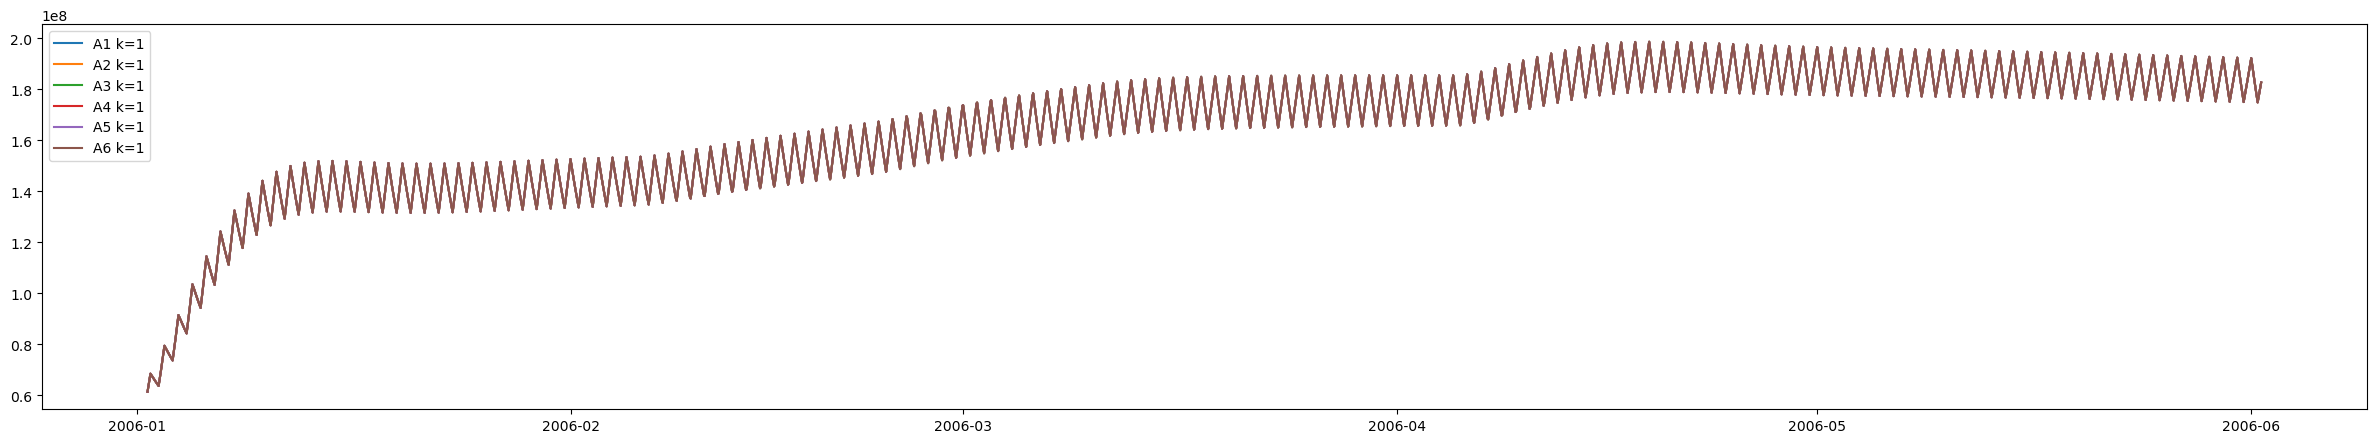

In [42]:
cgem_plotAs(grid,cgem)

## Get the number of Phytoplankton groups as a variable

Plotting CGEM variable Qn


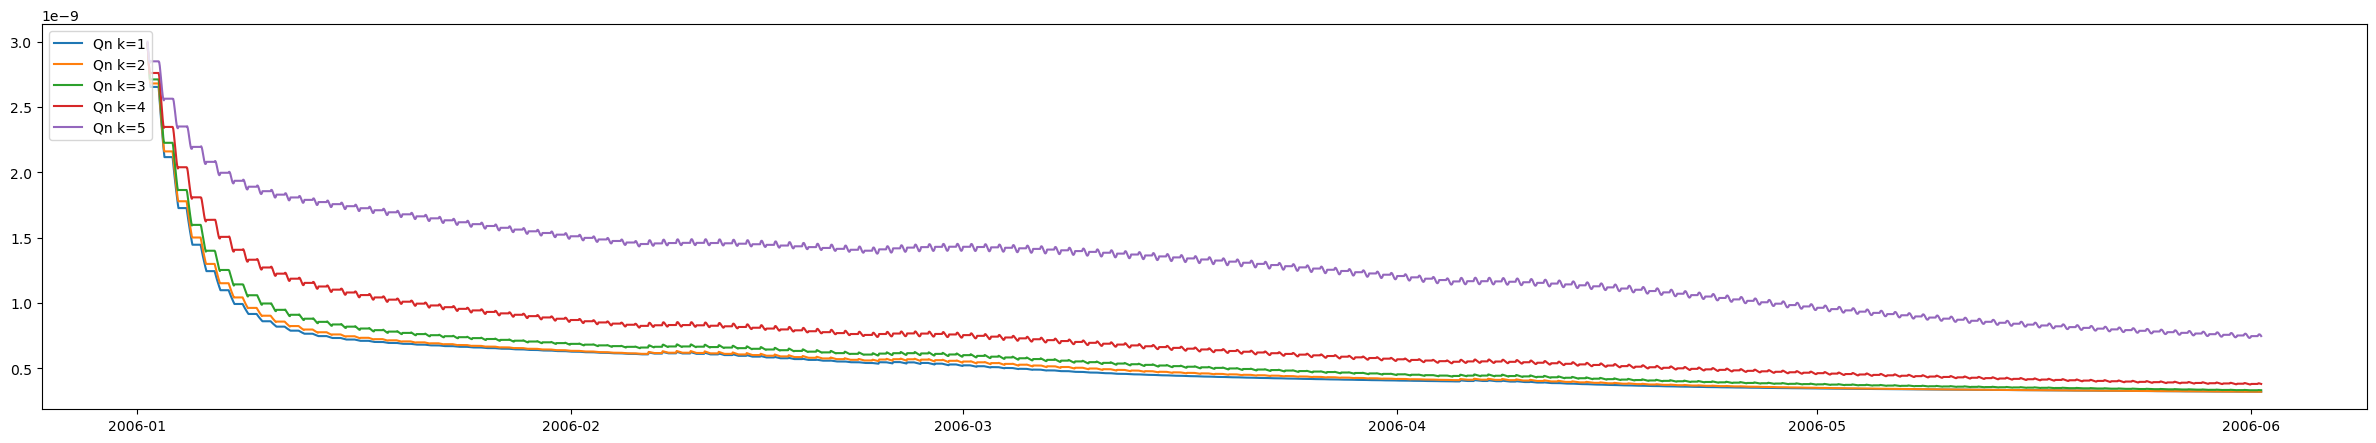

In [5]:
cgem_plotks(grid,'Qn')

Plotting CGEM variable Qp


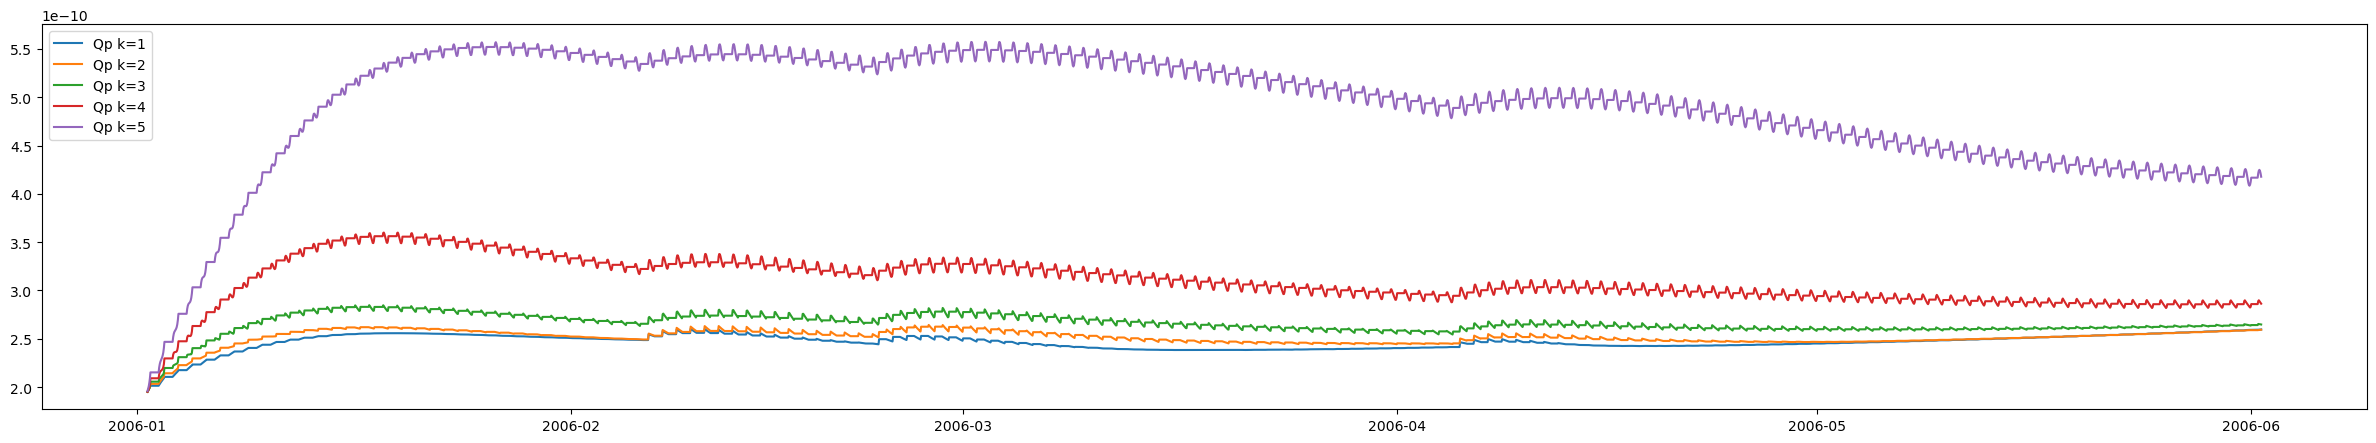

In [6]:
cgem_plotks(grid,'Qp')

Plotting CGEM variable Z1


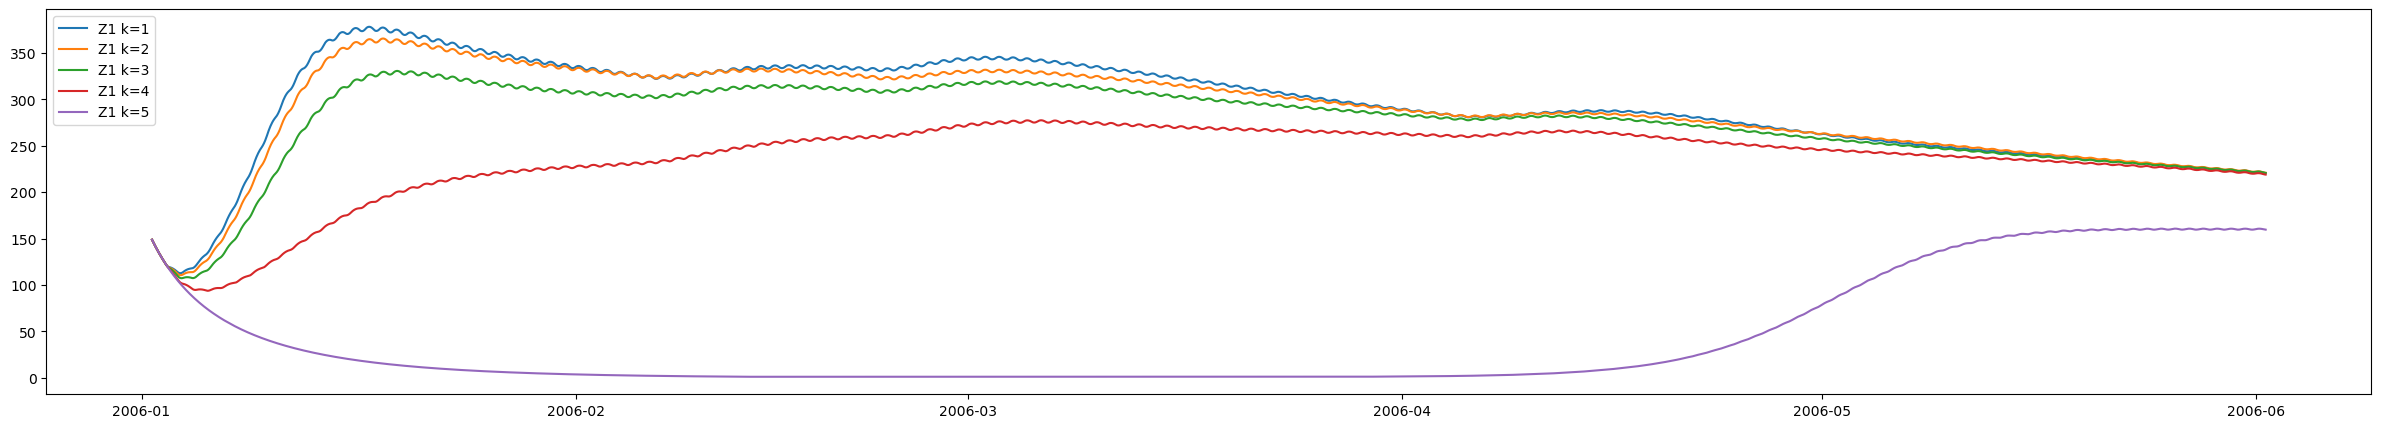

In [7]:
cgem_plotks(grid,'Z1')

Plotting CGEM variable Z2


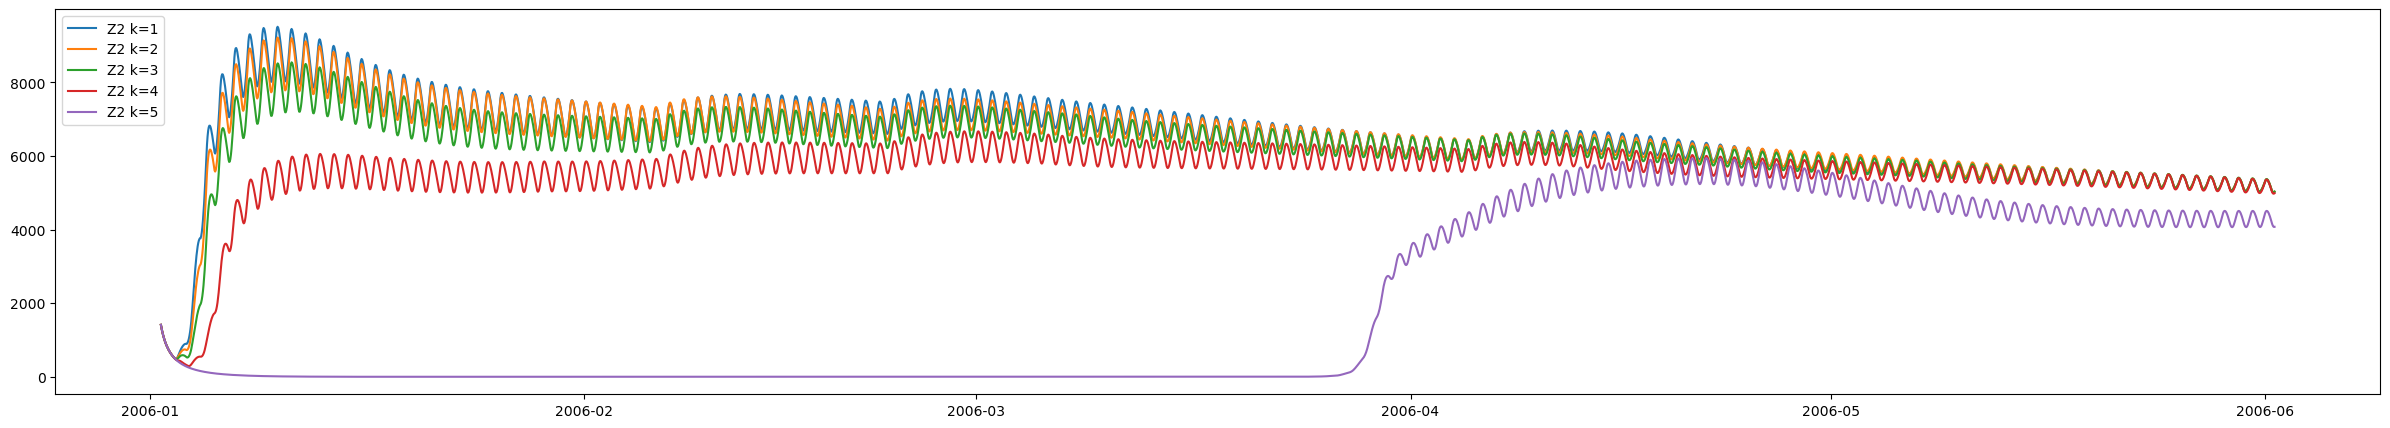

In [8]:
cgem_plotks(grid,'Z2')

Plotting CGEM variable NO3


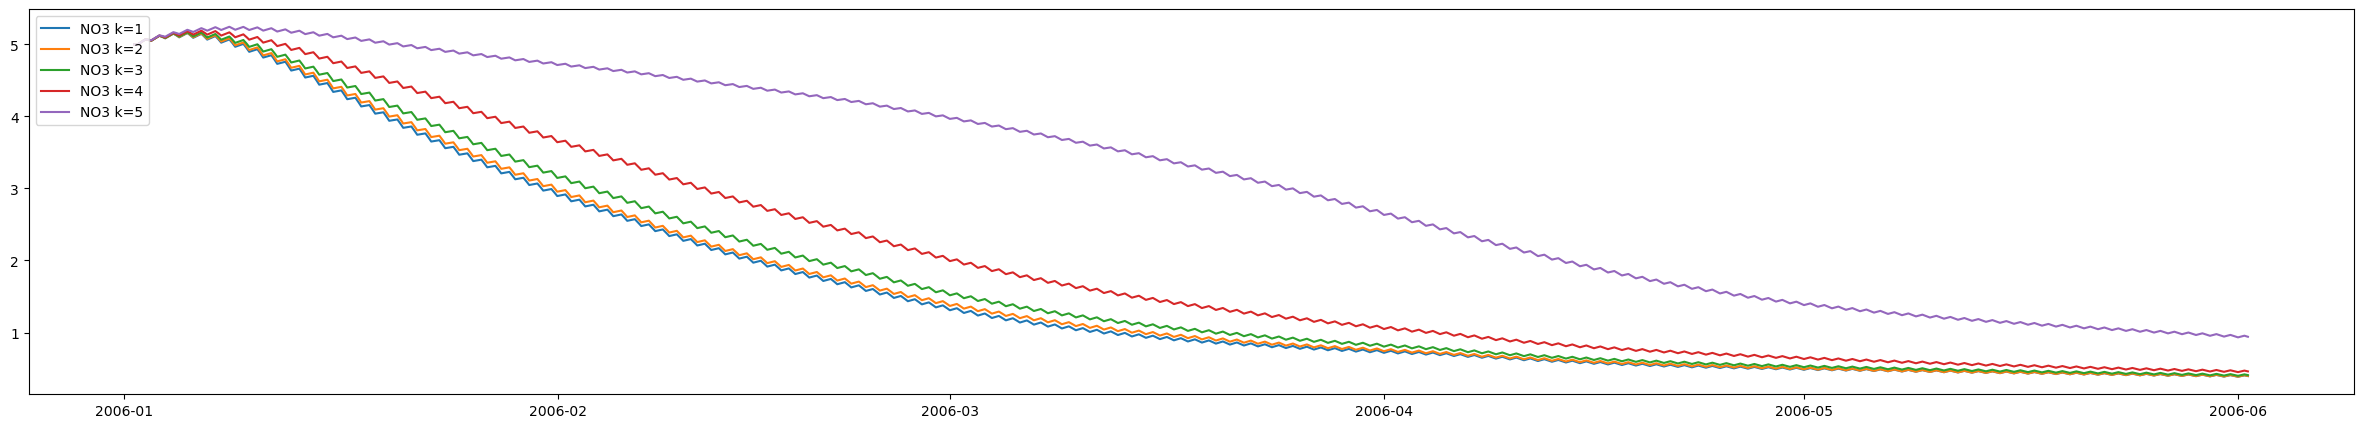

In [9]:
cgem_plotks(grid,'NO3')

Plotting CGEM variable NH4


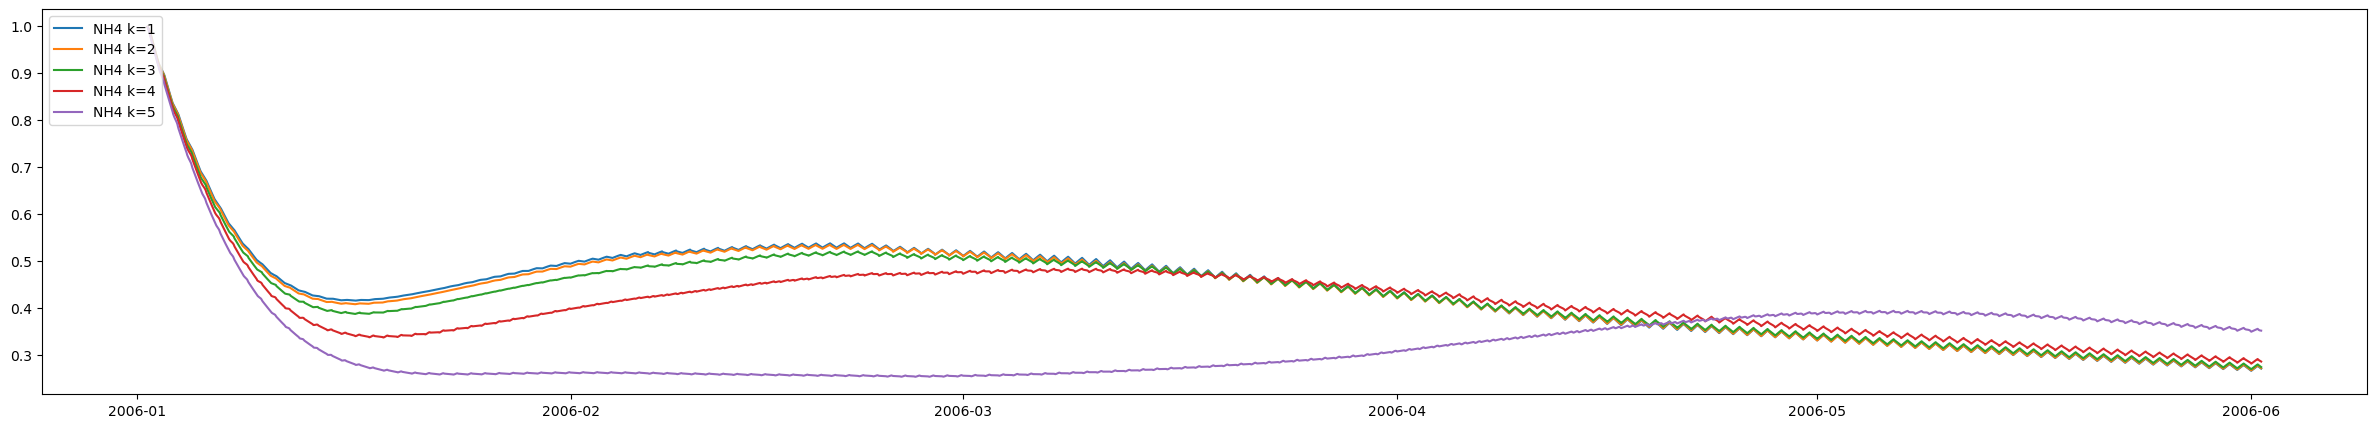

In [10]:
cgem_plotks(grid,'NH4')

Plotting CGEM variable PO4


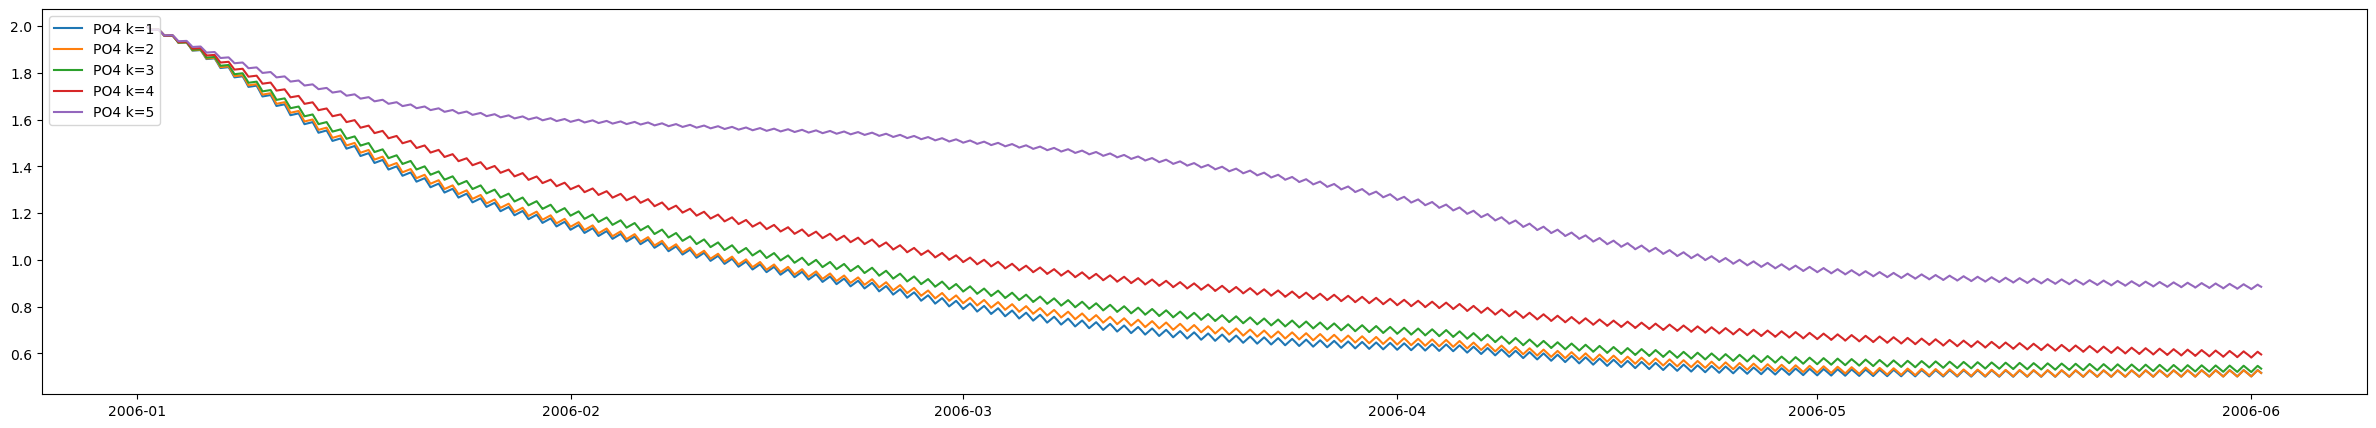

In [11]:
cgem_plotks(grid,'PO4')

Plotting CGEM variable DIC


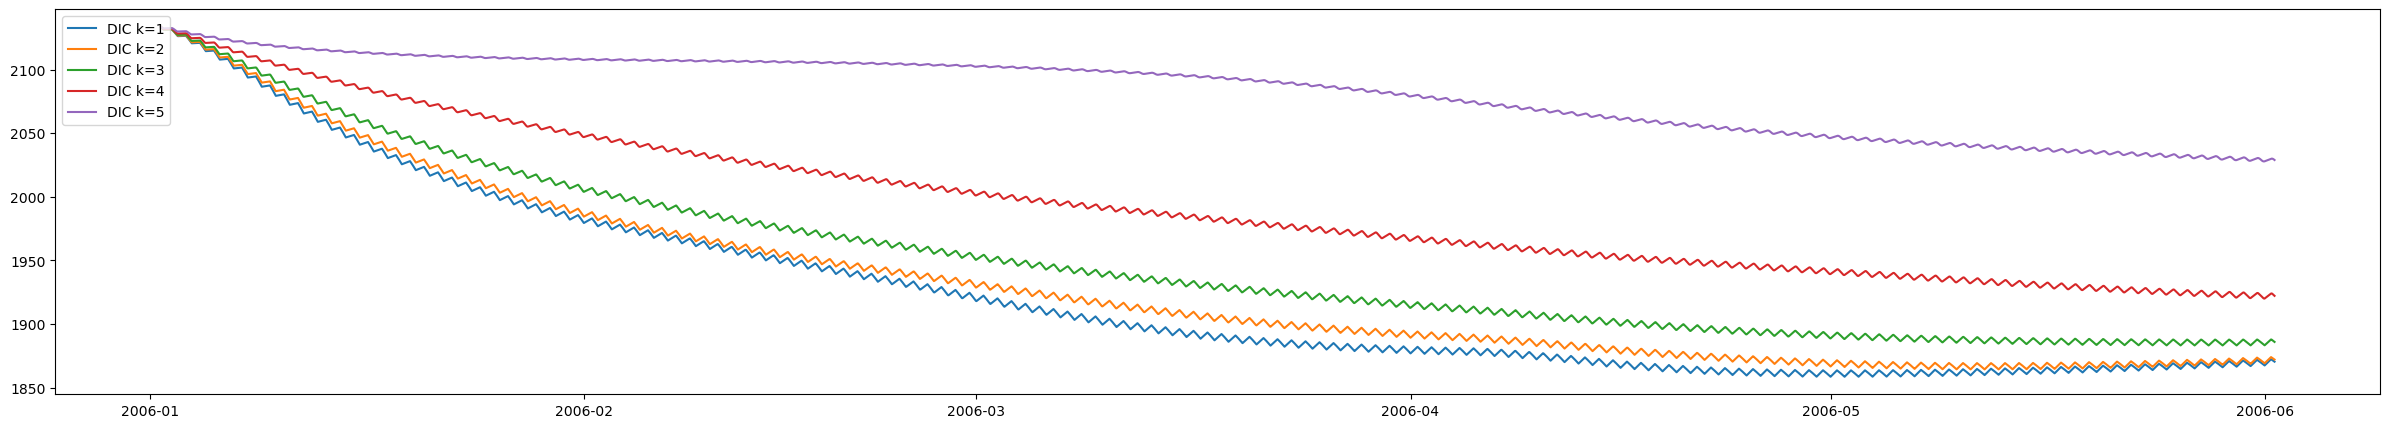

In [12]:
cgem_plotks(grid,'DIC')

Plotting CGEM variable O2


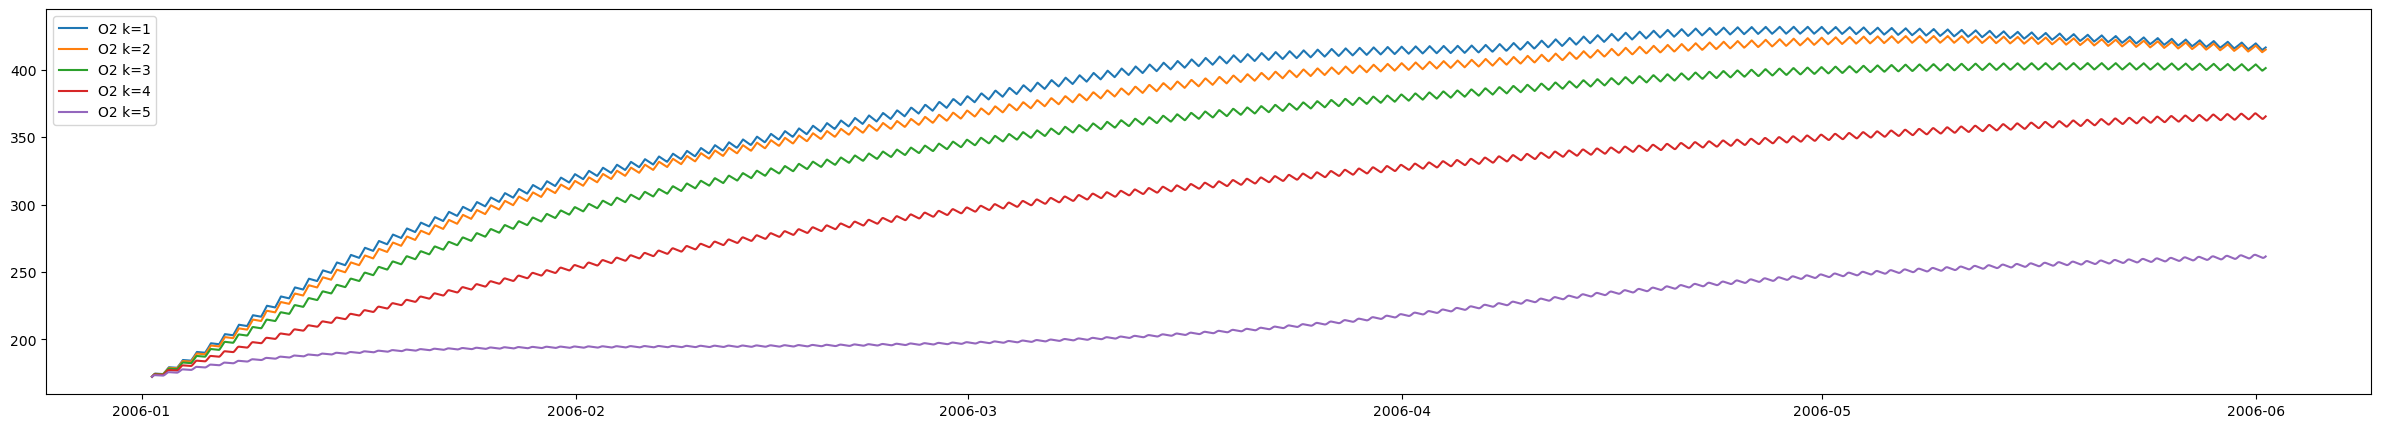

In [13]:
cgem_plotks(grid,'O2')

Plotting CGEM variable OM1_A


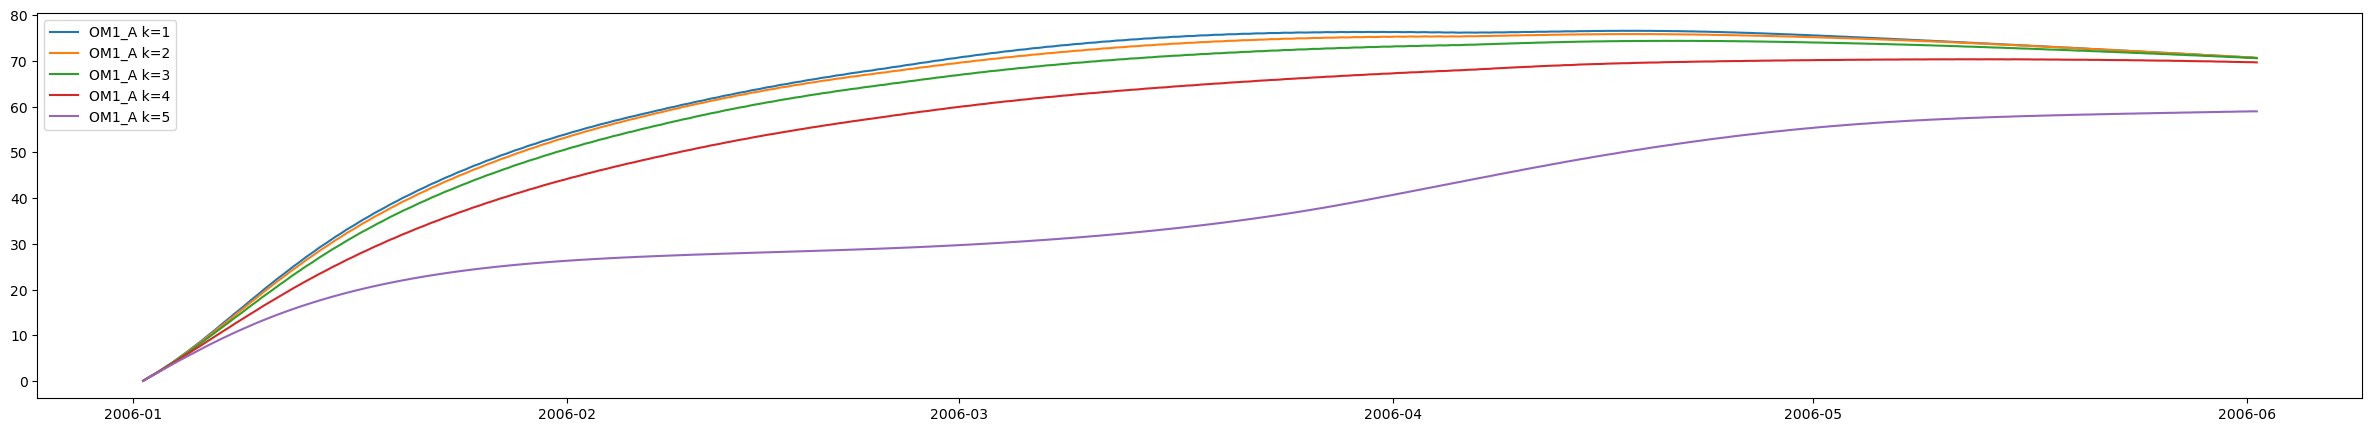

In [14]:
cgem_plotks(grid,'OM1_A')

Plotting CGEM variable OM2_A


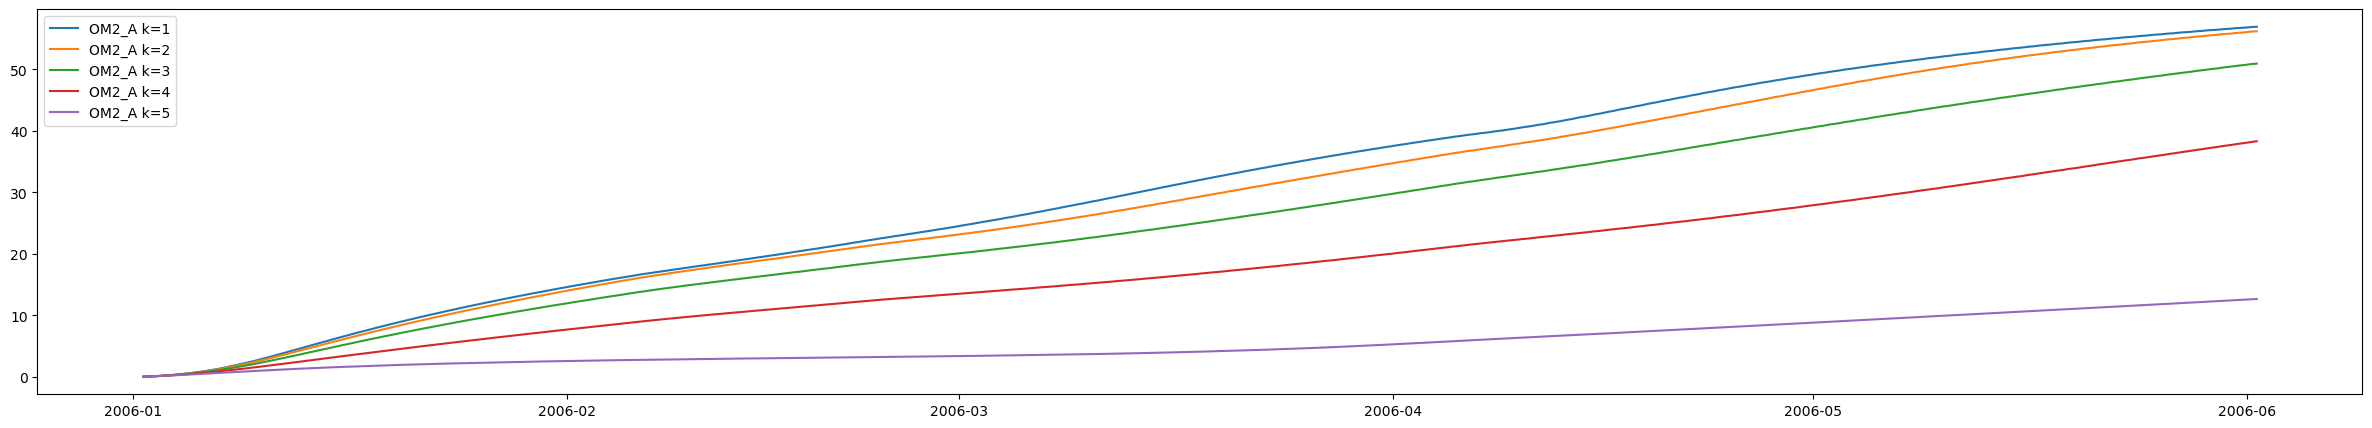

In [15]:
cgem_plotks(grid,'OM2_A')

Plotting CGEM variable OM1_Z


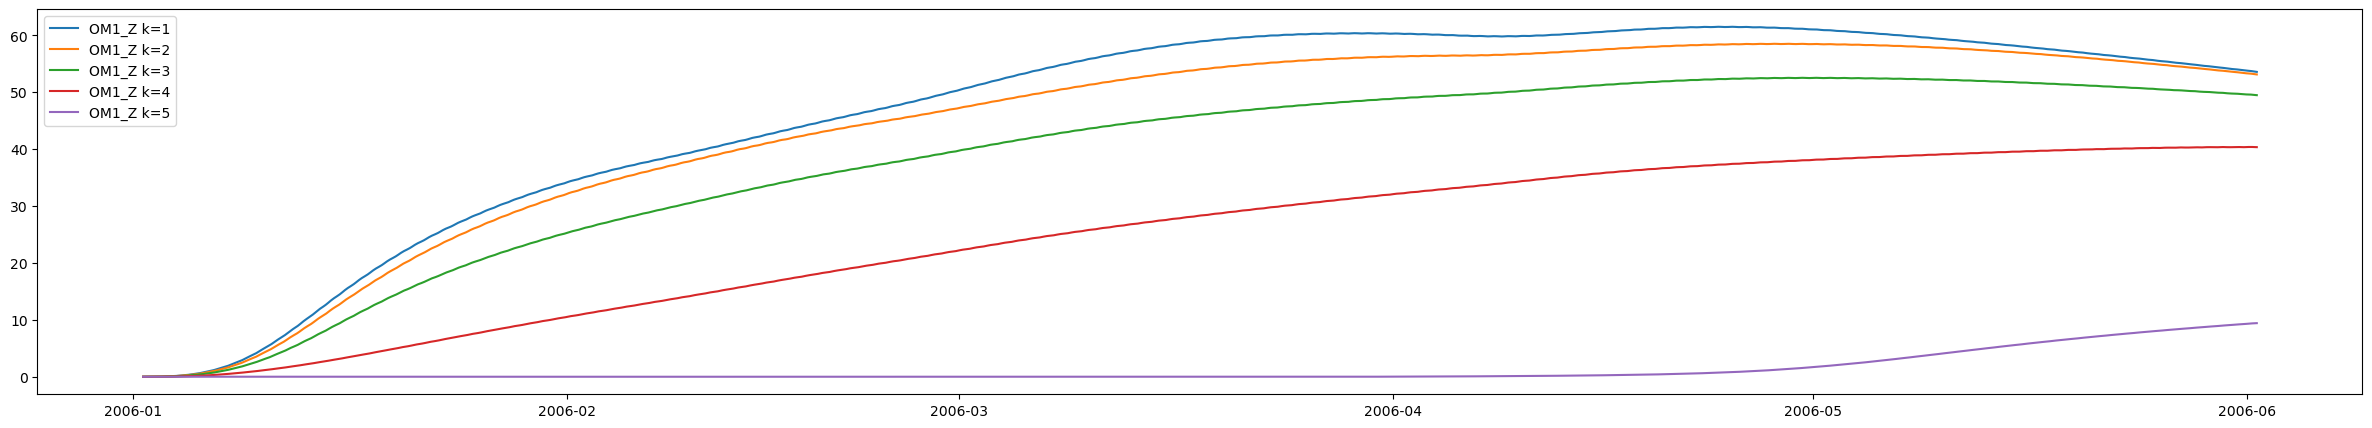

In [16]:
cgem_plotks(grid,'OM1_Z')

Plotting CGEM variable OM2_Z


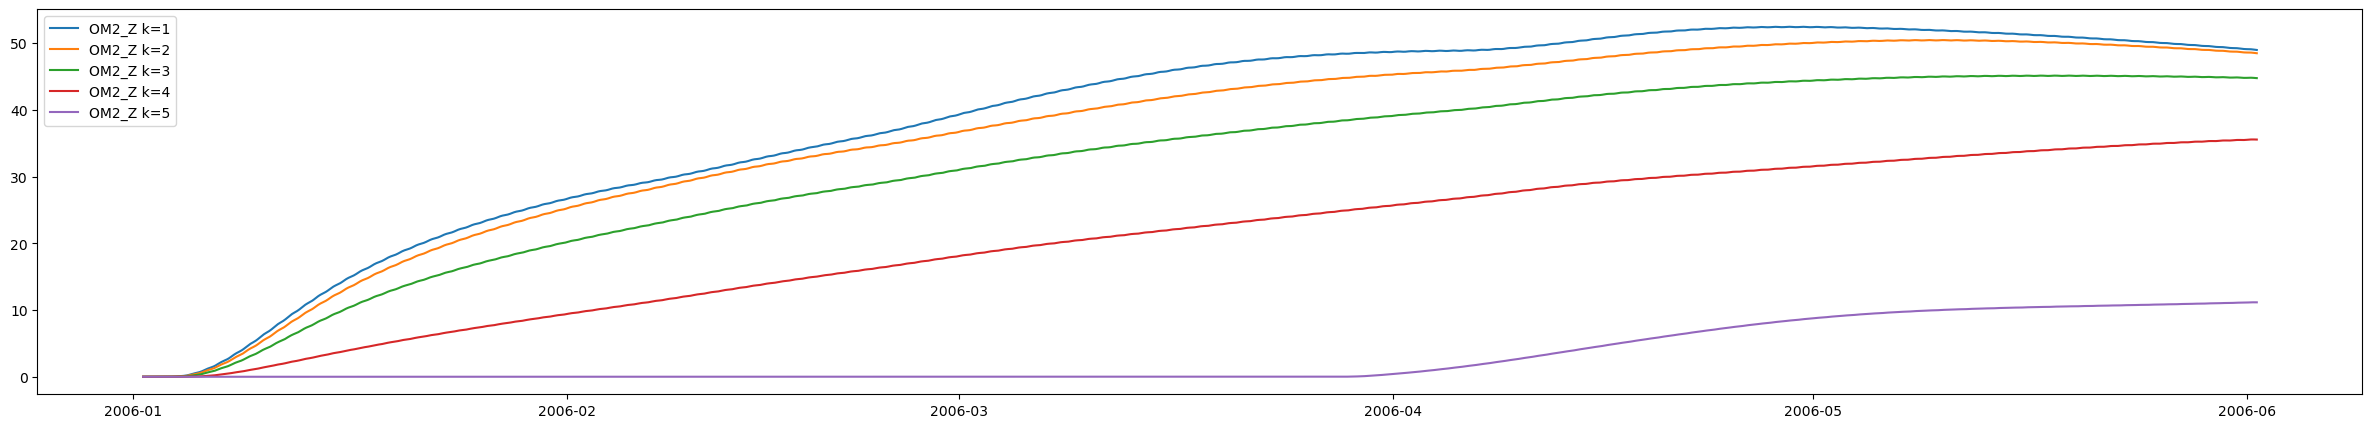

In [17]:
cgem_plotks(grid,'OM2_Z')

Plotting CGEM variable Si


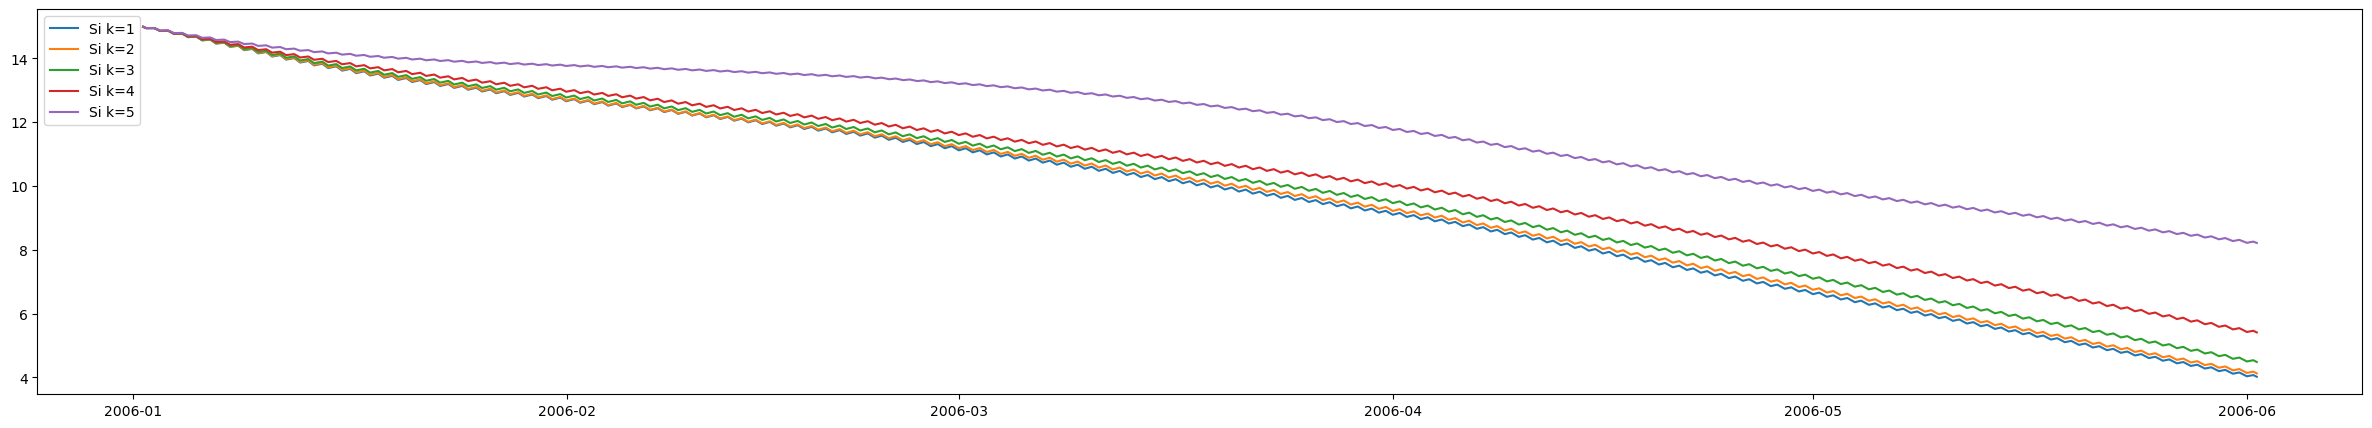

In [18]:
cgem_plotks(grid,'Si')

Plotting CGEM variable Alk


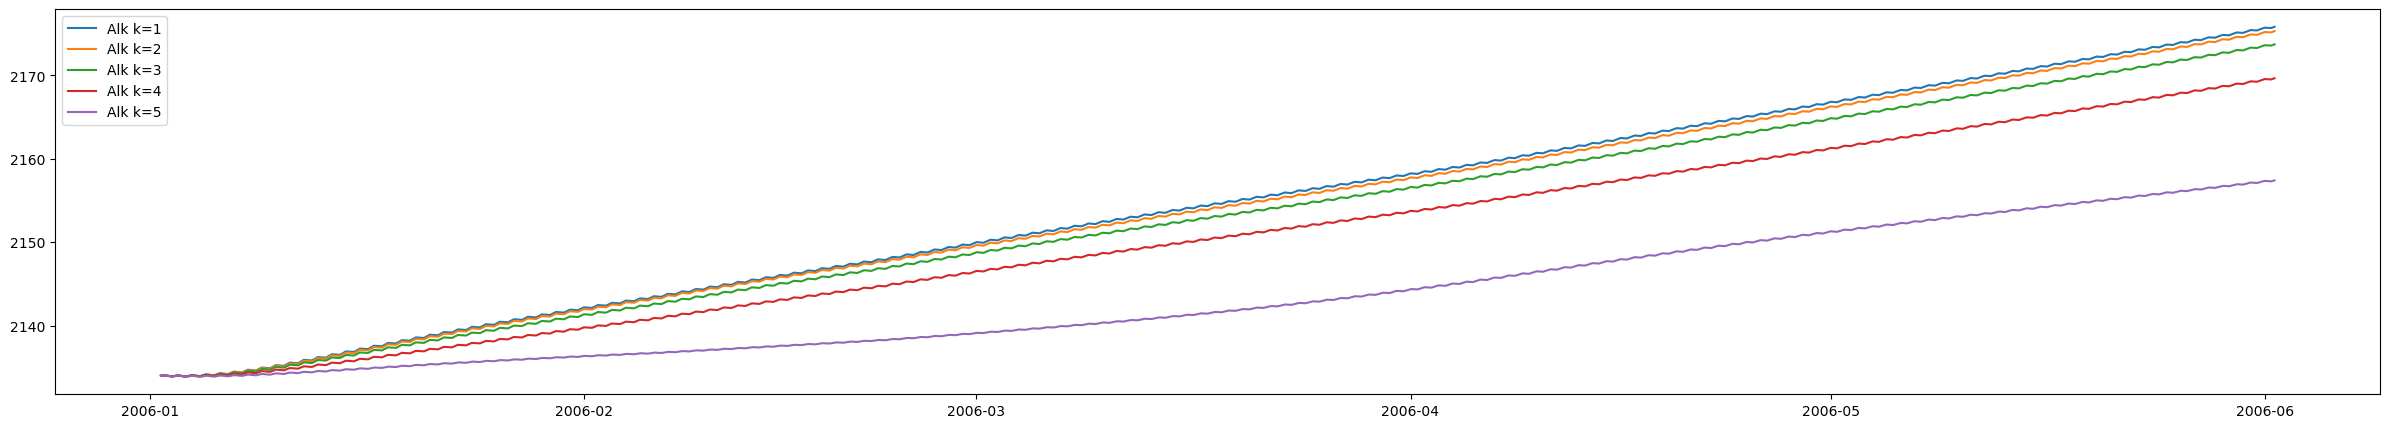

In [19]:
cgem_plotks(grid,'Alk')

Plotting CGEM variable CDOM


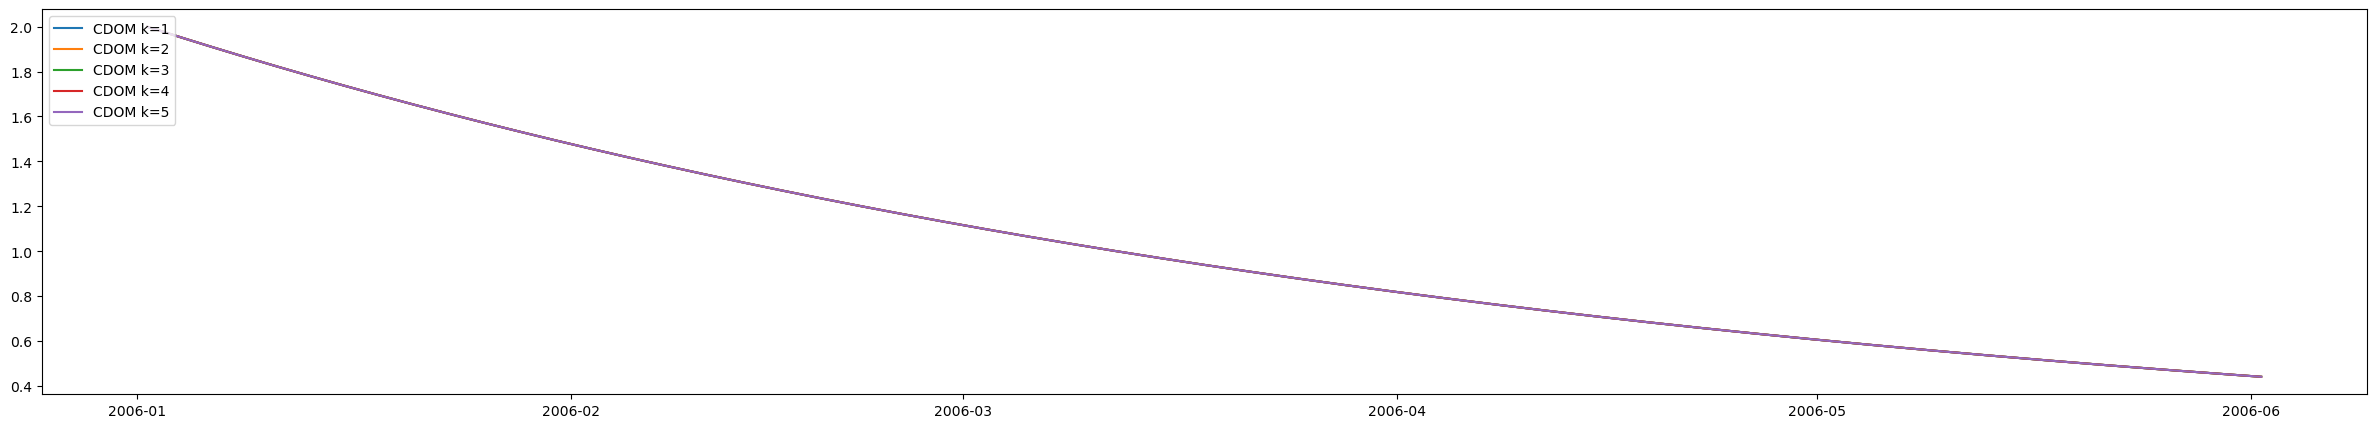

In [20]:
cgem_plotks(grid,'CDOM')

Plotting CGEM variable OM1_R


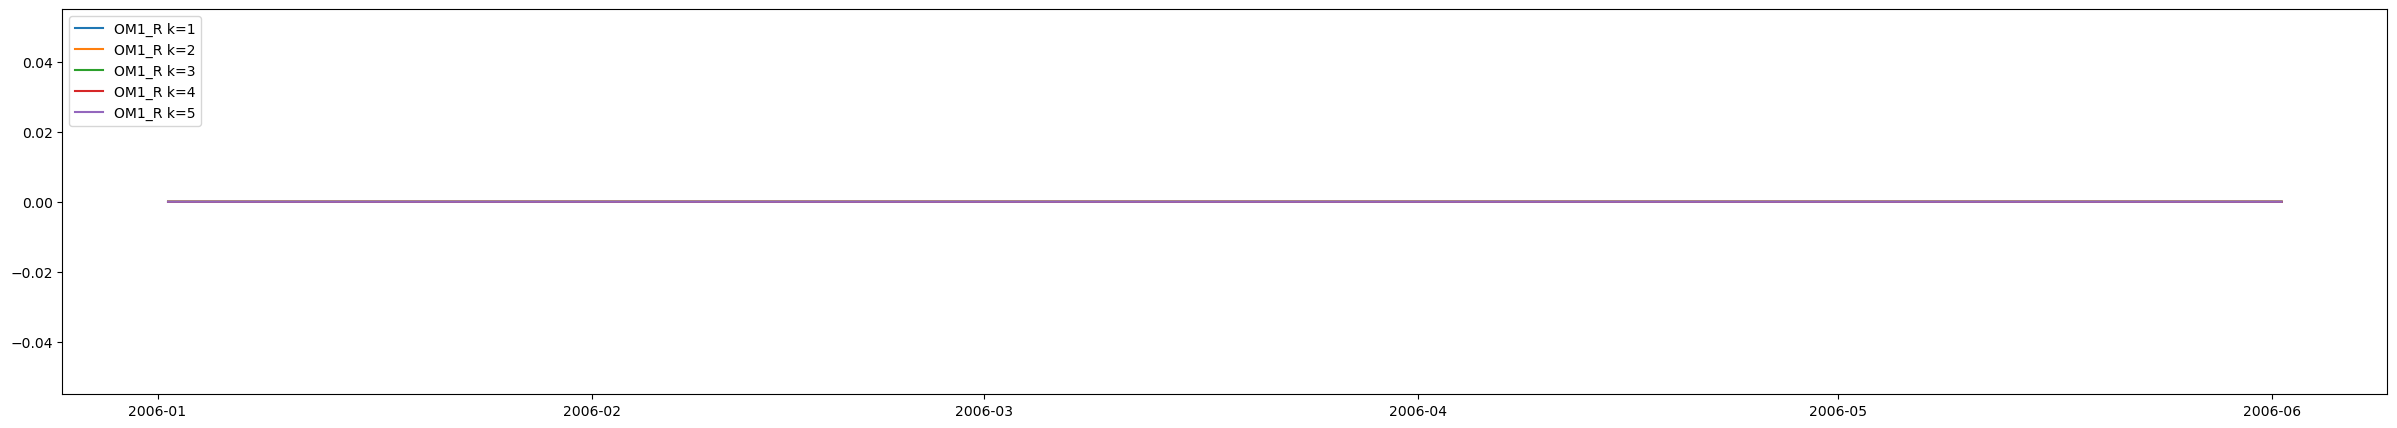

In [21]:
cgem_plotks(grid,'OM1_R')

Plotting CGEM variable OM2_R


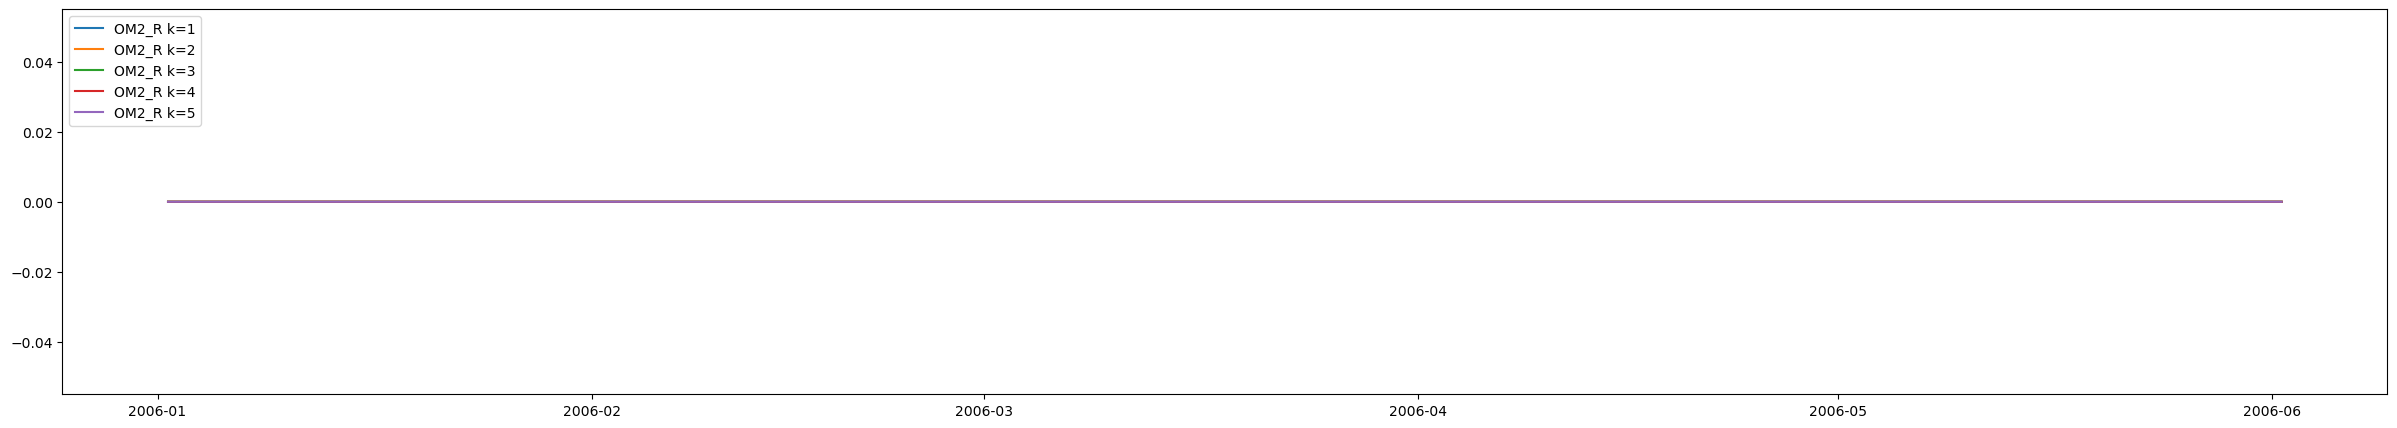

In [22]:
cgem_plotks(grid,'OM2_R')

Plotting CGEM variable OM1_BC


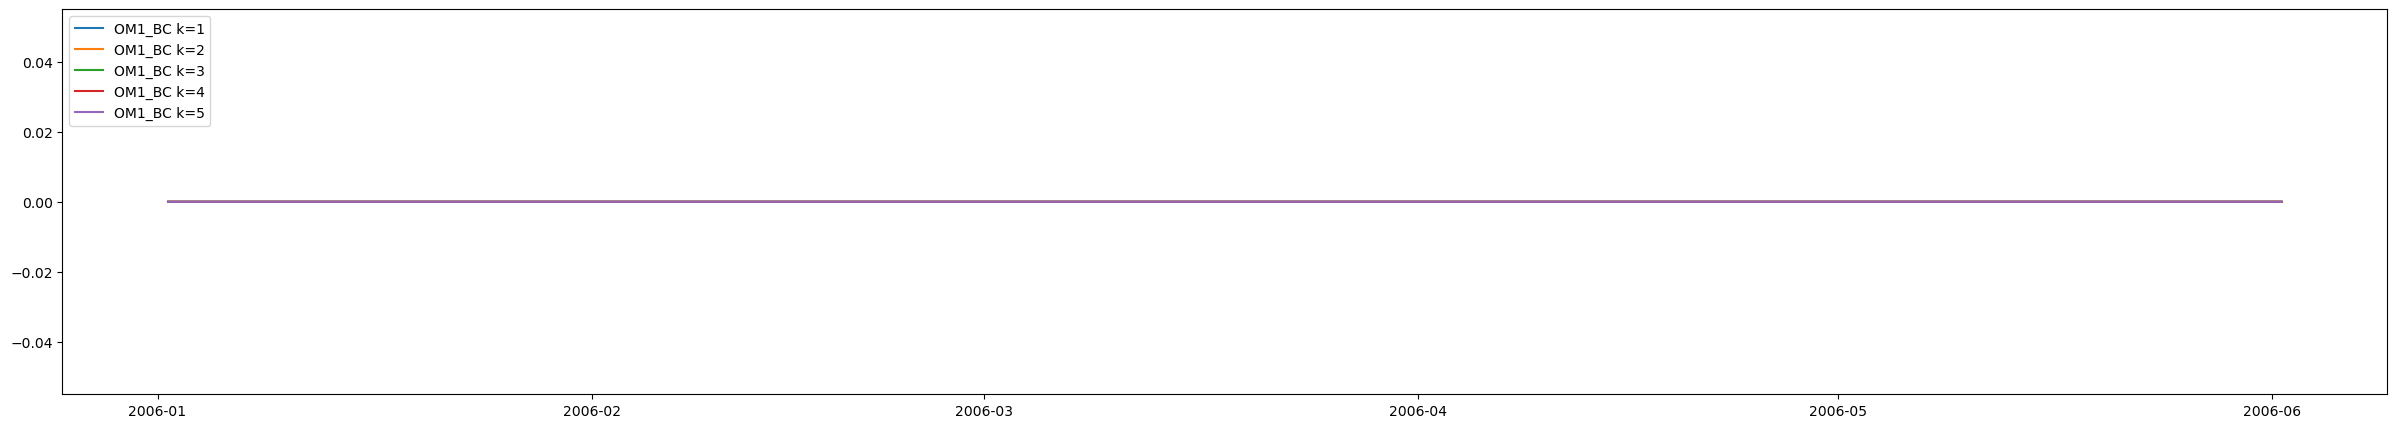

In [23]:
cgem_plotks(grid,'OM1_BC')

Plotting CGEM variable OM2_BC


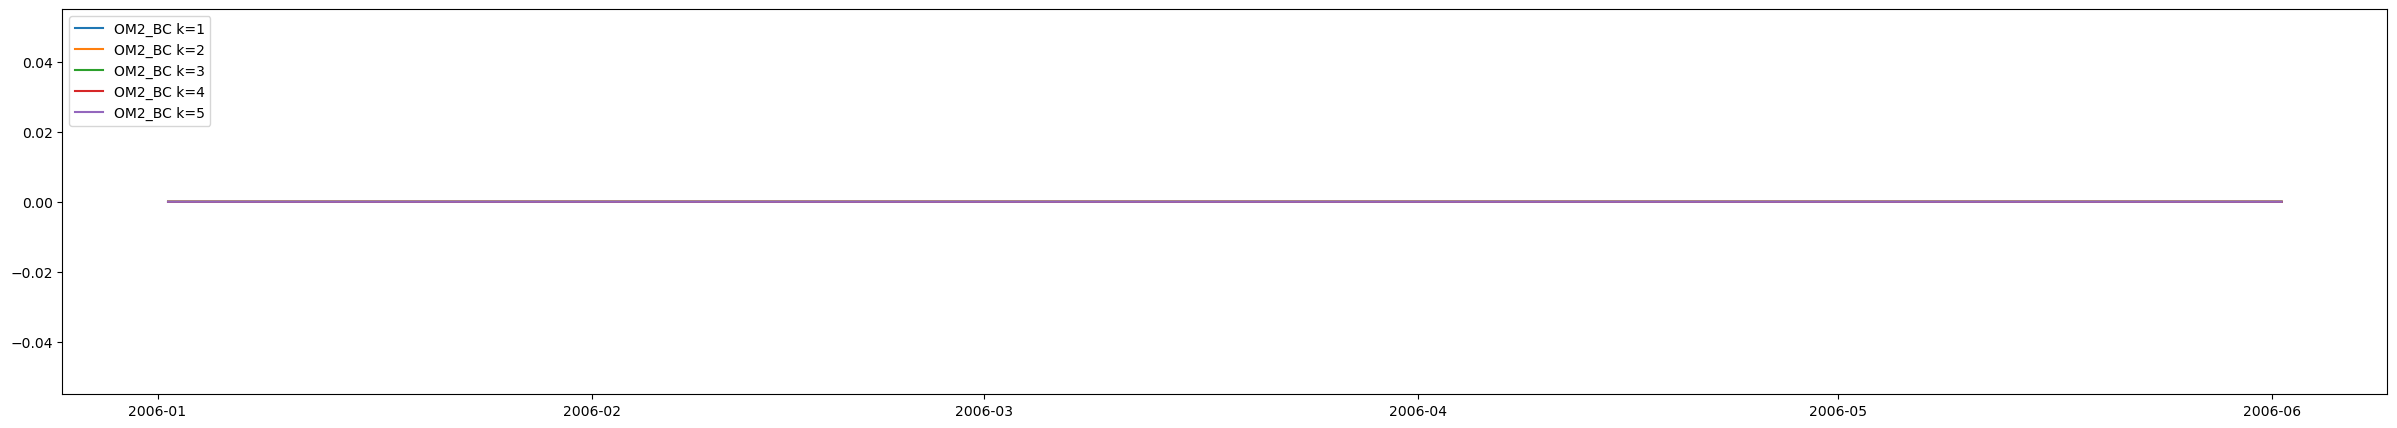

In [24]:
cgem_plotks(grid,'OM2_BC')